# Yatsaapp
This is a case study for Yatsaapp, a car rental company, seeking to analyse its performance and improve its sales.

The business questions include;
1. What is the average distance travelled by vehicles in a day, week or month? or over weekdays vs weekends?
2. What are the most common destinations for vehicles, and how often they travel to those destinations?
3. Are there any patterns or trends in driver behavior, such as speeding, that could be addressed through training or coaching?
4. Are there any patterns or trends in the types of trips made by vehicles? For example, do smaller vehicles make shorter or longer trips?





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#set colors to use in visualization
colors_4=['#FC4B91','#C73187','#921D78','#2F4858']
colors_10=["#2A034D", "#410B55", "#59135C", "#701B64", "#87236B", "#9F2B73", "#B6337A", "#CD3B82", "#E54389", "#FC4B91"]
colors_34=["#1B1025","#1F0D2F", "#230A39","#260643", "#2A034D", "#31054F", "#380852", "#400A54", "#470D56", "#4E0F59", "#55125B", "#5D145D", "#641760", "#6B1962", "#721C64", "#7A1E67",
           "#812169", "#88236B", "#8F266E", "#972870", "#9E2B73", "#A52D75", "#AC3077", "#B4327A", "#BB357C", "#C2377E", "#C93A81", "#D13C83",
           "#D83F85", "#DF4188", "#E6448A", "#EE468C", "#F5498F", "#FC4B91"]
sns.set_palette(sns.color_palette(colors_10))

In [ ]:
# with open('assets.json') as f:
with open('/content/drive/MyDrive/YatsaappCaseStudy/assets.json') as f:

  data=json.load(f)
assets=pd.DataFrame.from_dict(data)

In [ ]:
# with open('trips.json') as f:
with open('/content/drive/MyDrive/YatsaappCaseStudy/trips.json') as f:
  data=json.load(f)
trips=pd.json_normalize(data,max_level=1)

In [ ]:
assets.head()

,id,make,model,year
0,QRmYjfT,TOYOTA Ractis 1.0,Ractis 1.0,2006
1,DpXMzg3,Lexus CT 200h,CT 200h,None
2,4tQe9sV,Honda Odyssey,Odyssey,None
3,x2LJWsl,MITSUBISHI Lancer Cedia LA-CS2A,Lancer Cedia LA-CS2A,2005
4,eH0O4bf,Nissan,Note,2011


In [ ]:
assets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      34 non-null     object
 1   make    34 non-null     object
 2   model   21 non-null     object
 3   year    19 non-null     object
dtypes: object(4)
memory usage: 1.2+ KB


In [ ]:
assets.isnull().sum()

id        0
make      0
model    13
year     15
dtype: int64

In [ ]:
assets.describe()

,id,make,model,year
count,34,34,21,19
unique,34,29,20,13
top,QRmYjfT,TOYOTA,Alhambra,2010
freq,1,3,2,3


##### Observations
- `Assets` dataframe has 34 rows and 4 columns. The columns `make` and `year` have null values.
- The most common make is **TOYOTA** and most common model is **Alhambra**.

In [ ]:
trips.sample(5)

,id,created,asset_id,distance,points,origin.latitude,origin.longitude,origin.time_stamp,origin.address,origin.odometer,destination.latitude,destination.longitude,destination.time_stamp,destination.address,destination.odometer
4364,aRSeMlj,2023-02-12T09:39:28.801+00:00,r4rOacq,2264.81,"[{'bearing': 0.0, 'location': {'latitude': 1.0...",1.021785,34.996826,2023-02-12T06:00:16+00:00,"Kitale, Trans-Nzoia County, Kenya",None,1.029111,35.008698,2023-02-12T06:08:14+00:00,"Section six, Police Staff Housing, Kitale, Tra...",None
4186,Hwqem50,2022-11-12T18:15:44.131+00:00,4tQe9sV,401.33,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.324188,36.885017,2022-11-12T18:15:23+00:00,"Moses Tanui Road, Embakasi, Nairobi, Nairobi C...",None,-1.324405,36.882313,2022-11-12T18:26:25+00:00,"620, Nairobi, Kenya",None
2611,UHWAZ11,2023-02-26T17:31:22.834+00:00,NRLuFEH,1572.42,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.341411,36.666634,2023-02-26T17:31:20+00:00,"Ngong Road, Ngong, Kajiado County, Kenya",None,-1.348814,36.673466,2023-02-26T17:40:13+00:00,"Kimbo Zone, Karen, Ngong, Kajiado County, Kenya",None
243,E7FPCGC,2022-11-19T12:11:26.709+00:00,qBmr6ZX,421.59,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.164672,36.956226,2022-11-19T12:11:22+00:00,"Eastern By Pass, Ruiru, Kiambu County, Kenya",None,-1.163524,36.952610,2022-11-19T12:19:38+00:00,"Eastern Bypass, Ruiru, Kiambu County, Kenya",None
3807,RTyuc9j,2022-12-06T13:41:53.817+00:00,DpXMzg3,11162.36,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.329871,36.715874,2022-12-06T13:41:50+00:00,"The Waterfront Karen, Mall Along, Langata Rd, ...",None,-1.298407,36.788700,2022-12-06T14:07:06+00:00,"525 Kindaruma Road, Kilimani, Nairobi, Nairobi...",None


In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4804 entries, 0 to 4803
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      4804 non-null   object 
 1   created                 4804 non-null   object 
 2   asset_id                4804 non-null   object 
 3   distance                4804 non-null   float64
 4   points                  4804 non-null   object 
 5   origin.latitude         4804 non-null   float64
 6   origin.longitude        4804 non-null   float64
 7   origin.time_stamp       4804 non-null   object 
 8   origin.address          4803 non-null   object 
 9   origin.odometer         0 non-null      object 
 10  destination.latitude    4804 non-null   float64
 11  destination.longitude   4804 non-null   float64
 12  destination.time_stamp  4804 non-null   object 
 13  destination.address     4803 non-null   object 
 14  destination.odometer    0 non-null      

In [ ]:
trips.isnull().sum()

id                           0
created                      0
asset_id                     0
distance                     0
points                       0
origin.latitude              0
origin.longitude             0
origin.time_stamp            0
origin.address               1
origin.odometer           4804
destination.latitude         0
destination.longitude        0
destination.time_stamp       0
destination.address          1
destination.odometer      4804
dtype: int64

In [ ]:
trips.describe()

,distance,origin.latitude,origin.longitude,destination.latitude,destination.longitude
count,4804.000000,4804.000000,4804.000000,4804.000000,4804.000000
mean,11241.547325,-1.033155,36.911776,-1.033224,36.911758
std,20407.447419,0.433675,0.411567,0.435225,0.411621
min,101.510000,-3.229457,34.215324,-3.328162,34.217648
25%,1634.500000,-1.248051,36.824792,-1.249770,36.824720
50%,4962.310000,-1.126192,36.995655,-1.126177,36.993961
75%,11809.925000,-1.051952,37.092146,-1.051691,37.092073
max,342478.600000,1.256370,40.124302,1.256327,40.126652


#####Observations
- Trips dataframe has 4804 rows and 15 columns.
- `origin.odometer` and `destination.odometer` have no values.
- `destination.address` and `destination.address` have one null value each.
- The **average** distance covered by all assets is **11241.547325** metres.

##Data Cleaning

Make a copy of each dataframe. It is good practice before cleaning the dataframes.



In [ ]:
assets_copy=assets.copy()
trips_copy=trips.copy()

###Assets Dataframe
1. Retain `id` and `make` columns to later merge with the trips dataframe.

In [ ]:
assets_copy = assets_copy[['id','make']]

### Trips Dataframe
1. Drop the row containing null values in the `destination.address` and `origin.address` columns.

In [ ]:
trips_copy = trips_copy[trips_copy['origin.address'].notna()]
trips_copy.isna().sum()

id                           0
created                      0
asset_id                     0
distance                     0
points                       0
origin.latitude              0
origin.longitude             0
origin.time_stamp            0
origin.address               0
origin.odometer           4803
destination.latitude         0
destination.longitude        0
destination.time_stamp       0
destination.address          0
destination.odometer      4803
dtype: int64

2. Convert `time_stamp` columns to datetime data type and create new columns from the `origin.time_stamp` and `destination.time_stamp`

In [ ]:
trips_copy['origin.time_stamp']= pd.to_datetime(trips_copy['origin.time_stamp'])
trips_copy['destination.time_stamp']= pd.to_datetime(trips_copy['destination.time_stamp'])

In [ ]:

trips_copy['origin.day']=trips_copy['origin.time_stamp'].dt.day
trips_copy['destination.day']=trips_copy['destination.time_stamp'].dt.day
trips_copy['origin.month']=trips_copy['origin.time_stamp'].dt.strftime('%Y-%m')
trips_copy['year']=trips_copy['origin.time_stamp'].dt.year
trips_copy['origin.weekday']= trips_copy['origin.time_stamp'].dt.day_name()
trips_copy['destination.weekday']= trips_copy['destination.time_stamp'].dt.day_name()
trips_copy['origin.hour'] = trips_copy['origin.time_stamp'].dt.hour
trips_copy['destination.hour'] = trips_copy['destination.time_stamp'].dt.hour
trips_copy['time_taken']= (pd.to_datetime(trips_copy['destination.time_stamp'])-pd.to_datetime(trips_copy['origin.time_stamp'])).dt.total_seconds()
trips_copy['speed']= (trips_copy['distance']/1000)/(trips_copy['time_taken']/3600)

# Map day of week to weekday (0=Monday to 4=Friday) or weekend (5=Saturday or 6=Sunday)
trips_copy['weekend'] = trips_copy['origin.time_stamp'].dt.dayofweek.map({0:0, 1:0, 2:0, 3:0, 4:0, 5:1, 6:1})

# Define function to determine time of day
def time_of_day(x):
    if x in range(6, 12):
        return 'Morning'
    elif x in range(12, 16):
        return 'Afternoon'
    elif x in range(16, 22):
        return 'Evening'
    else:
        return 'Late night'

# Apply function to create time of day columns
trips_copy['origin.time_of_day'] = trips_copy['origin.hour'].apply(time_of_day)
trips_copy['destination.time_of_day'] = trips_copy['destination.hour'].apply(time_of_day)


In [ ]:
trips_copy

,id,created,asset_id,distance,points,origin.latitude,origin.longitude,origin.time_stamp,origin.address,origin.odometer,...,year,origin.weekday,destination.weekday,origin.hour,destination.hour,time_taken,speed,weekend,origin.time_of_day,destination.time_of_day
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",None,...,2022,Monday,Monday,17,17,1340.0,11.610403,0,Evening,Evening
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",None,...,2023,Tuesday,Tuesday,8,10,4796.0,18.542882,0,Morning,Morning
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,...,2023,Tuesday,Tuesday,6,8,6256.0,17.660066,0,Morning,Morning
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",None,...,2023,Tuesday,Tuesday,5,6,4647.0,19.064692,0,Late night,Morning
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",None,...,2023,Tuesday,Tuesday,3,4,6256.0,16.340242,0,Late night,Late night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4799,GeaklYd,2023-02-21T11:41:10.948+00:00,3XBsRFw,13803.78,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.040364,37.069199,2023-02-21 11:41:06+00:00,"385 Mombasa Road, Thika, Kiambu County, Kenya",None,...,2023,Tuesday,Tuesday,11,12,3545.0,14.017943,0,Morning,Afternoon
4800,NSzqS6B,2023-02-21T10:17:02.952+00:00,3XBsRFw,4968.03,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.040324,37.069244,2023-02-21 10:16:54+00:00,"385 OAU Road, Thika, Kiambu County, Kenya",None,...,2023,Tuesday,Tuesday,10,10,1251.0,14.296489,0,Morning,Morning
4801,jMW6L4T,2023-02-21T09:15:30.916+00:00,3XBsRFw,10180.62,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.047289,37.073498,2023-02-21 09:15:27+00:00,"Garissa Road, Thika, Kiambu County, Kenya",None,...,2023,Tuesday,Tuesday,9,10,3013.0,12.164033,0,Morning,Morning
4802,pNnBGll,2023-02-21T08:41:38.993+00:00,3XBsRFw,3134.15,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.042714,37.068249,2023-02-21 08:41:32+00:00,"30, Thika, Kenya",None,...,2023,Tuesday,Tuesday,8,8,596.0,18.931107,0,Morning,Morning


4. Merge the `trips` and `assets` dataframes.

In [ ]:
merged_df = pd.merge(trips_copy, assets_copy, left_on='asset_id',right_on='id').drop('id_y',axis=1)
merged_df

,id_x,created,asset_id,distance,points,origin.latitude,origin.longitude,origin.time_stamp,origin.address,origin.odometer,...,origin.weekday,destination.weekday,origin.hour,destination.hour,time_taken,speed,weekend,origin.time_of_day,destination.time_of_day,make
0,35Ldjpf,2022-03-14T17:31:51.003+00:00,0ROajub,4321.65,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.043220,37.067928,2022-03-14 17:31:47+00:00,"Thika Garissa Highway, Total, Thika, Kenya",None,...,Monday,Monday,17,17,1340.0,11.610403,0,Evening,Evening,HONDA
1,agWTdy5,2023-03-07T08:53:55.607+00:00,0gMAW5w,24703.24,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305577,36.824627,2023-03-07 08:53:51+00:00,"Nyayo Stadium, Nairobi, Kenya",None,...,Tuesday,Tuesday,8,10,4796.0,18.542882,0,Morning,Morning,TOYOTA
2,mcXsPmo,2023-03-07T06:40:53.771+00:00,0gMAW5w,30689.27,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.430067,36.688068,2023-03-07 06:40:48+00:00,"Magadi Road, Kiserian, Kajiado County, Kenya",None,...,Tuesday,Tuesday,6,8,6256.0,17.660066,0,Morning,Morning,TOYOTA
3,WRBY3Lt,2023-03-07T05:12:29.007+00:00,0gMAW5w,24609.34,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.305490,36.825317,2023-03-07 05:12:26+00:00,"Nyayo Stadium, Nairobi, Kenya",None,...,Tuesday,Tuesday,5,6,4647.0,19.064692,0,Late night,Morning,TOYOTA
4,1WaNBeb,2023-03-07T03:15:18.67+00:00,0gMAW5w,28395.71,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.397144,36.759830,2023-03-07 03:15:15+00:00,"Soronik Road, Nairobi, Kenya",None,...,Tuesday,Tuesday,3,4,6256.0,16.340242,0,Late night,Late night,TOYOTA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,GeaklYd,2023-02-21T11:41:10.948+00:00,3XBsRFw,13803.78,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.040364,37.069199,2023-02-21 11:41:06+00:00,"385 Mombasa Road, Thika, Kiambu County, Kenya",None,...,Tuesday,Tuesday,11,12,3545.0,14.017943,0,Morning,Afternoon,BAJAJ
4799,NSzqS6B,2023-02-21T10:17:02.952+00:00,3XBsRFw,4968.03,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.040324,37.069244,2023-02-21 10:16:54+00:00,"385 OAU Road, Thika, Kiambu County, Kenya",None,...,Tuesday,Tuesday,10,10,1251.0,14.296489,0,Morning,Morning,BAJAJ
4800,jMW6L4T,2023-02-21T09:15:30.916+00:00,3XBsRFw,10180.62,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.047289,37.073498,2023-02-21 09:15:27+00:00,"Garissa Road, Thika, Kiambu County, Kenya",None,...,Tuesday,Tuesday,9,10,3013.0,12.164033,0,Morning,Morning,BAJAJ
4801,pNnBGll,2023-02-21T08:41:38.993+00:00,3XBsRFw,3134.15,"[{'bearing': 0.0, 'location': {'latitude': -1....",-1.042714,37.068249,2023-02-21 08:41:32+00:00,"30, Thika, Kenya",None,...,Tuesday,Tuesday,8,8,596.0,18.931107,0,Morning,Morning,BAJAJ


3. Create categories of the `make` of the vehicles

In [ ]:
merged_df['make'].unique()

array(['HONDA', 'TOYOTA', 'TUK TUK', 'BMW F650 GS 218', 'SUZUKI EVERY',
       'NOAH', 'TOYOTA Ractis 1.0', 'PIAGGIO', 'PEUGEOT 207',
       'TOYOTA HILUX  TGN26R - Manual', 'TOYOTA HIACE', 'MARUTI',
       'LEXUS NX 300H CVT', 'Tuk Tuk', 'MITSUBISHI Lancer Cedia LA-CS2A',
       'TOYOTA PROBOX', 'NISSAN MARCH/micra/MT', 'TOYOTA COROLLA',
       'Nissan', 'Car', 'CAR', 'HAOJIN', 'tuk tuk', 'Lexus CT 200h',
       'Honda Odyssey', 'Mitsubishi', 'NISSAN X-TRAIL Mpfi CVT(NEW) NT32',
       'MAZDA Demio', 'BAJAJ'], dtype=object)

In [ ]:
merged_df.loc[merged_df['make'].str.contains('tuk',case=False),'vehicle'] = 'Tuk Tuk'
merged_df.loc[merged_df['make'].str.contains('Bajaj|Piaggio',case=False),'vehicle'] = 'Motorbike'
merged_df.loc[~merged_df['make'].str.contains('tuk|Bajaj|Piaggio',case=False),'vehicle'] = 'Car'


4. Retain the useful columns from the merged dataframe.

In [ ]:
df = merged_df[['distance', 'origin.address','destination.address','origin.day','origin.month',	'year',	'origin.weekday',	'destination.day',
                'destination.weekday',	'make', 'weekend', 'speed', 'origin.time_of_day',	'destination.time_of_day', 'vehicle']]
df

,distance,origin.address,destination.address,origin.day,origin.month,year,origin.weekday,destination.day,destination.weekday,make,weekend,speed,origin.time_of_day,destination.time_of_day,vehicle
0,4321.65,"Thika Garissa Highway, Total, Thika, Kenya","Kenyatta Highway, Thika, Kiambu County, Kenya",14,2022-03,2022,Monday,14,Monday,HONDA,0,11.610403,Evening,Evening,Car
1,24703.24,"Nyayo Stadium, Nairobi, Kenya","Magadi Road, Kiserian, Kajiado County, Kenya",7,2023-03,2023,Tuesday,7,Tuesday,TOYOTA,0,18.542882,Morning,Morning,Car
2,30689.27,"Magadi Road, Kiserian, Kajiado County, Kenya","Nyayo Stadium, Nairobi, Kenya",7,2023-03,2023,Tuesday,7,Tuesday,TOYOTA,0,17.660066,Morning,Morning,Car
3,24609.34,"Nyayo Stadium, Nairobi, Kenya","Magadi Road, Kiserian, Kajiado County, Kenya",7,2023-03,2023,Tuesday,7,Tuesday,TOYOTA,0,19.064692,Late night,Morning,Car
4,28395.71,"Soronik Road, Nairobi, Kenya","Gandhi Avenue, Nairobi West, Nairobi, Nairobi ...",7,2023-03,2023,Tuesday,7,Tuesday,TOYOTA,0,16.340242,Late night,Late night,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,13803.78,"385 Mombasa Road, Thika, Kiambu County, Kenya","OAU Road, Thika, Kiambu County, Kenya",21,2023-02,2023,Tuesday,21,Tuesday,BAJAJ,0,14.017943,Morning,Afternoon,Motorbike
4799,4968.03,"385 OAU Road, Thika, Kiambu County, Kenya","Enterprise Road, Thika, Kenya",21,2023-02,2023,Tuesday,21,Tuesday,BAJAJ,0,14.296489,Morning,Morning,Motorbike
4800,10180.62,"Garissa Road, Thika, Kiambu County, Kenya","OAU Road, Thika, Kiambu County, Kenya",21,2023-02,2023,Tuesday,21,Tuesday,BAJAJ,0,12.164033,Morning,Morning,Motorbike
4801,3134.15,"30, Thika, Kenya","Garissa Road, Thika, Kiambu County, Kenya",21,2023-02,2023,Tuesday,21,Tuesday,BAJAJ,0,18.931107,Morning,Morning,Motorbike


### Data Exploration



#### 1.What is the average distance travelled by vehicles in a day, week or month? or over weekdays vs weekends?



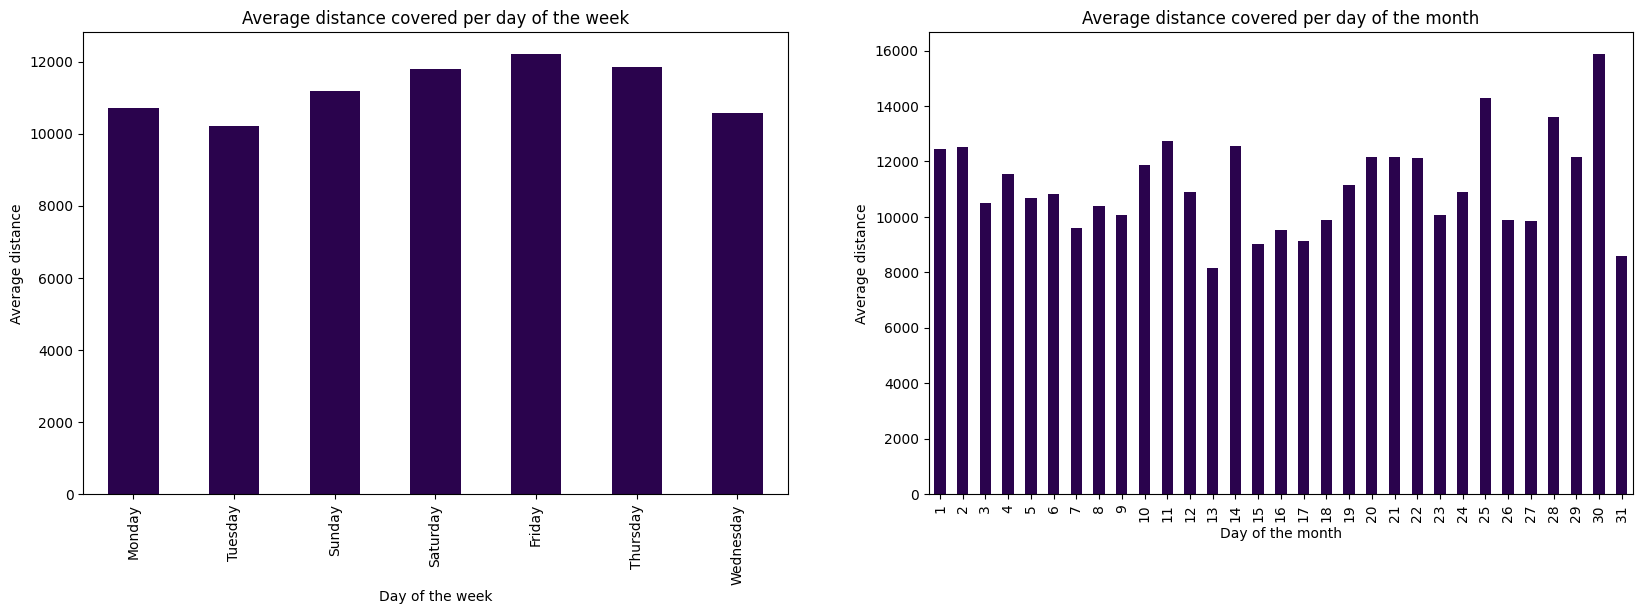

In [ ]:
dist_mday=df.groupby(['origin.day'])['distance'].mean()
dist_wday=df.groupby(['origin.weekday'], sort = False)['distance'].mean()

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
dist_wday.plot(kind='bar', title='Average distance covered per day of the week', xlabel= 'Day of the week', ylabel='Average distance', ax=ax1);
dist_mday.plot(kind='bar', title='Average distance covered per day of the month', xlabel= 'Day of the month', ylabel='Average distance', ax=ax2);

##### Average distance covered in a week and weekday vs weekends


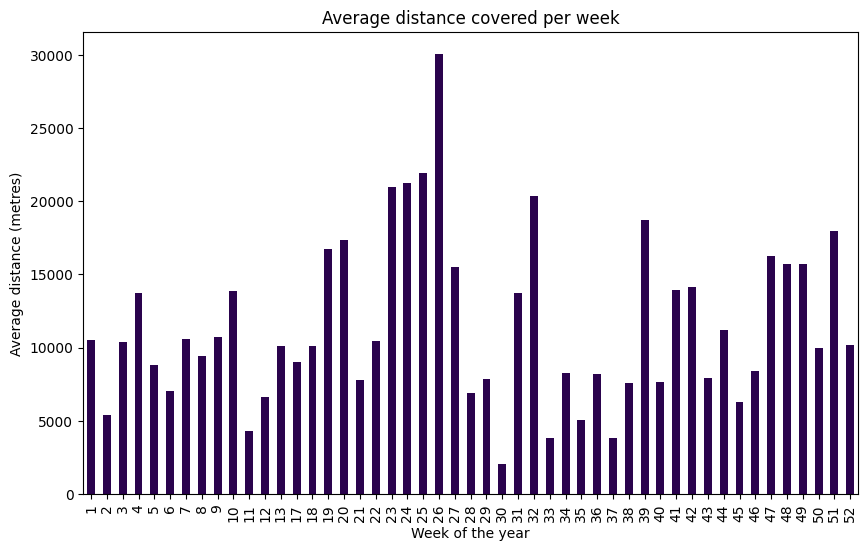

In [ ]:
weekly_distance = df.groupby(trips_copy['origin.time_stamp'].dt.isocalendar().week)['distance'].mean()
weekly_distance.plot(kind='bar', title='Average distance covered per week', xlabel= 'Week of the year', ylabel='Average distance (metres)', figsize=(10,6));

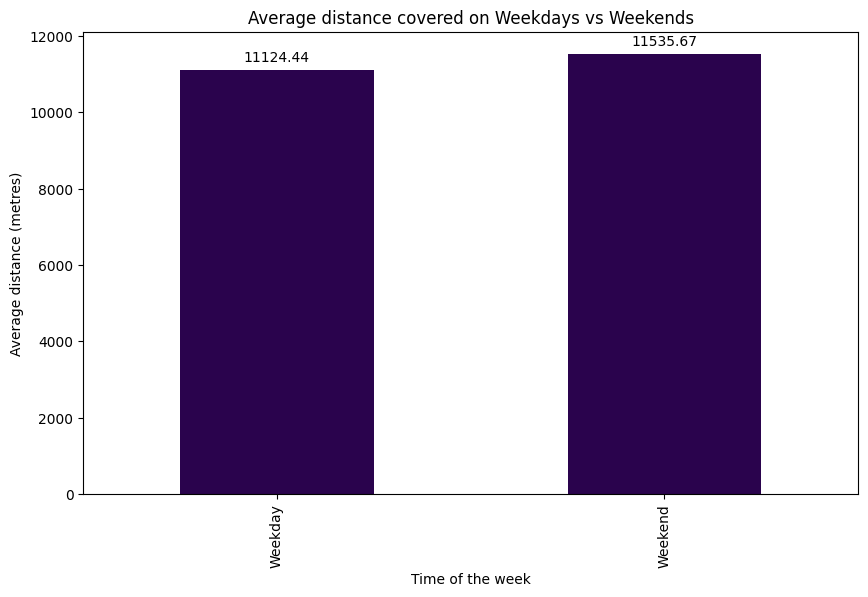

In [ ]:
week_distance = df.groupby(df['weekend'])['distance'].mean()
ax = week_distance.plot(kind='bar', title='Average distance covered on Weekdays vs Weekends', xlabel= 'Time of the week',
                   ylabel='Average distance (metres)', figsize=(10,6));
ax.set_xticklabels(['Weekday', 'Weekend']);
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.7}', (x + width/2, y + height*1.02), ha='center')

- Vehicles recorded the **longest** distances travelled over the **23rd-26th week** in the **March 2022 - March 2023** year.
- Vehicles cover **slightly longer** distances over the **weekend** than **weekdays**.

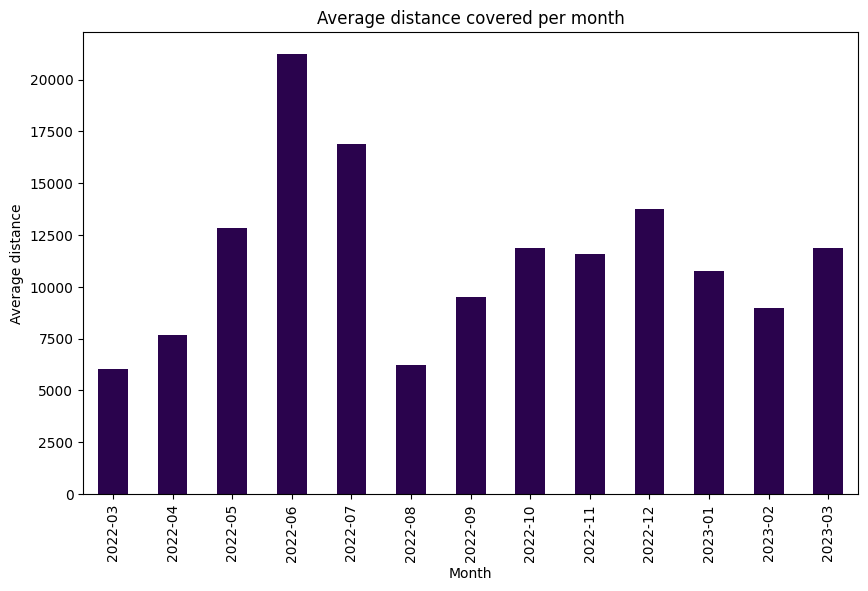

In [ ]:
dist_month=df.groupby(['origin.month'])['distance'].mean()
dist_month.plot(kind='bar', title='Average distance covered per month', xlabel= 'Month', ylabel='Average distance', figsize=(10,6));

- Vehicles collectively covered the **longest** distances in **June** and **July** in 2022 and the **shortest** distances in **March** and **August** in 2022

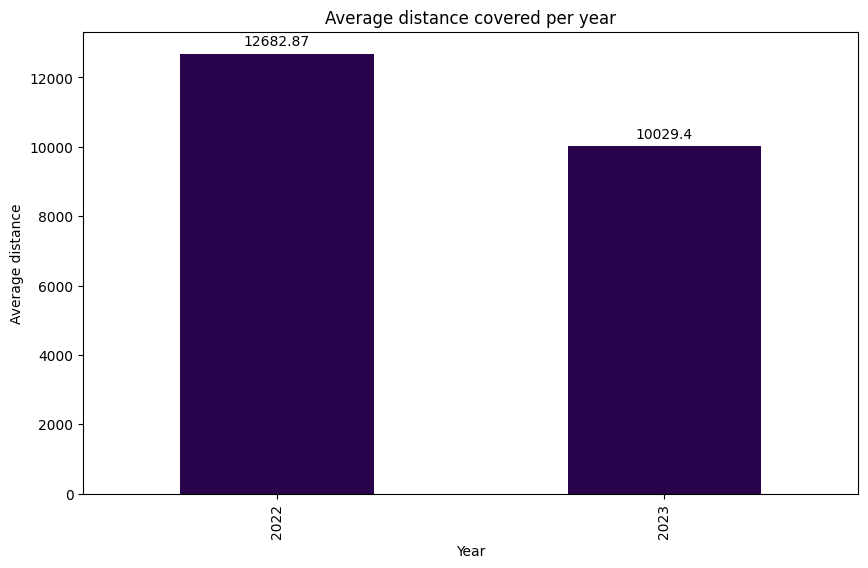

In [ ]:
dist_year=df.groupby(['year'])['distance'].mean()
ax = dist_year.plot(kind='bar', title='Average distance covered per year', xlabel= 'Year', ylabel='Average distance', figsize=(10,6));

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.7}', (x + width/2, y + height*1.02), ha='center');

- Vehicles collectively covered an average distance of **12682.87** metres in **Mar-Dec 2022** and **10029.40** metres in **Jan-March 2023**

####2. What are the most common destinations for vehicles, and how often they travel to those destinations?

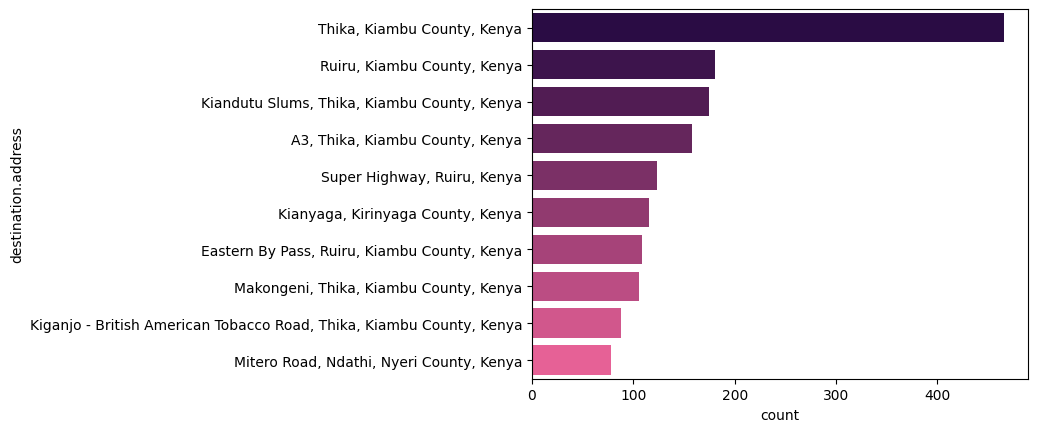

In [ ]:
sns.countplot(y='destination.address',data=df,order=pd.value_counts(df['destination.address']).iloc[:10].index,palette=sns.color_palette(colors_10, 10));

In [ ]:
distance=df.groupby('destination.weekday',sort=True)['destination.address'].value_counts().reset_index(name="count")
df_plot=distance.iloc[distance.groupby('destination.weekday')['count'].nlargest(3).index.get_level_values(1)].reset_index(drop=True)
df_plot

,destination.weekday,destination.address,count
0,Friday,"Thika, Kiambu County, Kenya",57
1,Friday,"A3, Thika, Kiambu County, Kenya",32
2,Friday,"Ruiru, Kiambu County, Kenya",30
3,Monday,"Thika, Kiambu County, Kenya",81
4,Monday,"Kiandutu Slums, Thika, Kiambu County, Kenya",39
5,Monday,"Super Highway, Ruiru, Kenya",21
6,Saturday,"Thika, Kiambu County, Kenya",70
7,Saturday,"Eastern By Pass, Ruiru, Kiambu County, Kenya",31
8,Saturday,"Kianyaga, Kirinyaga County, Kenya",30
9,Sunday,"Thika, Kiambu County, Kenya",74


- The **top destination counties** are **Kiambu**, **Kirinyaga** and **Nyeri** based on the top 10 destinations.
- **Thika, Kiambu County, Kenya** is the most popular destination every day of the week

###3. Are there any patterns or trends in driver behavior, such as speeding, that could be addressed through training or coaching?


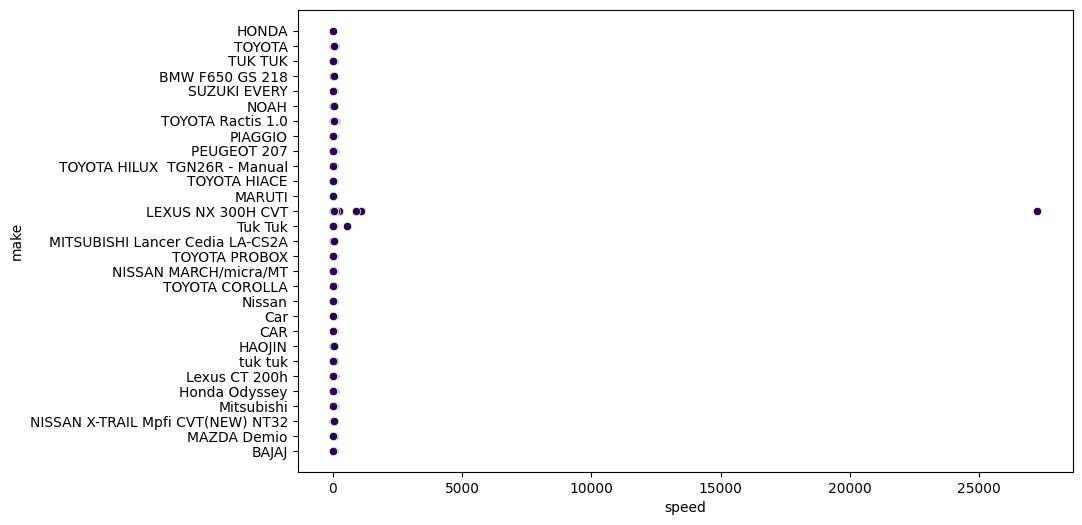

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(y="make", x="speed", data=df);

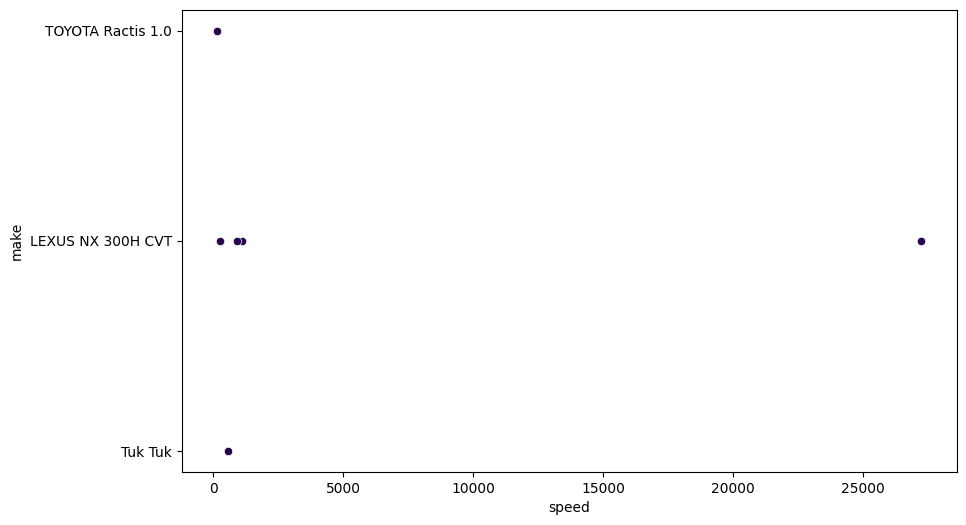

In [ ]:
fig, ax = plt.subplots(figsize = (10,6))
sns.scatterplot(y="make", x="speed", data=df.loc[df['speed'] > 120]);

Deducing from the scatter visualizations above, the data has outliers in the Speed column.

There are speeds exceeding 5000 km/h, which is unrealistic.

In [ ]:
# Filtering the outliers
df = df[df.speed < 360]

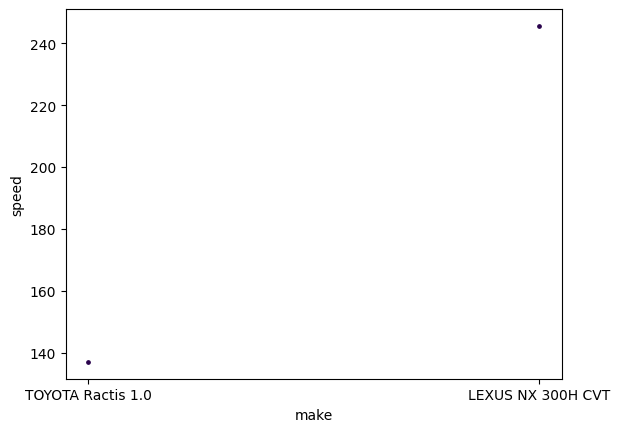

In [ ]:
sns.scatterplot(data=df.loc[df['speed'] > 120],
            y='speed', x='make', linewidth=2.5);

- Lexus NX 300H CVT, TOYOTA RACTIS 1.0 and Tuk Tuk **exceed** the speed limit of **120km/hr**

###4. Are there any patterns or trends in the types of trips made by vehicles? For example, do  smaller vehicles make shorter or longer trips?

In [ ]:
df['make'] = df['make'].replace('tuk tuk', 'Tuk Tuk')
df['make'] = df['make'].replace('TUK TUK', 'Tuk Tuk')
df['make'] = df['make'].replace('Car', 'CAR')

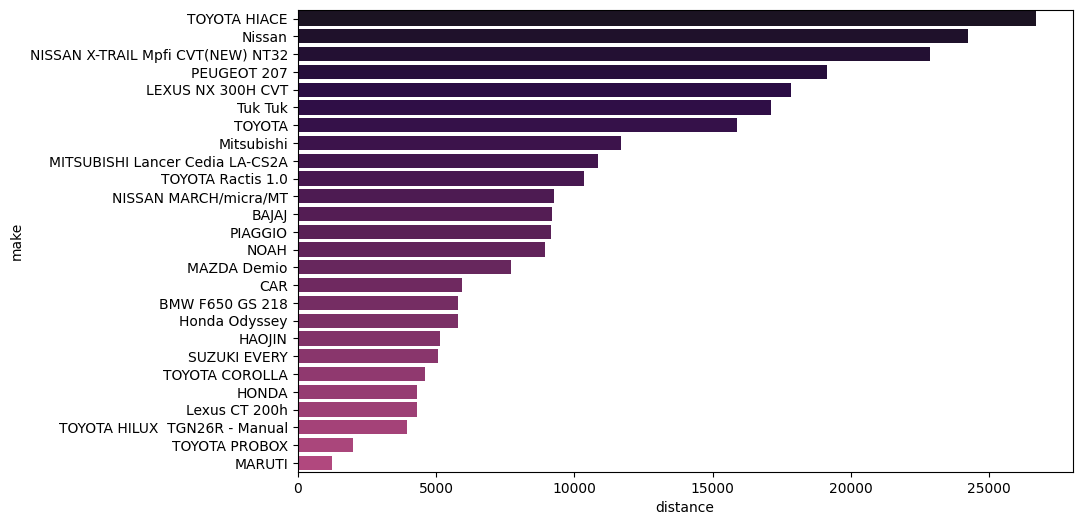

In [ ]:
av_dist=df.groupby(['make'])['distance'].mean().sort_values(ascending=False).index
plt.figure(figsize=(10,6))
sns.barplot(x='distance',y='make', data=df, order=av_dist, errorbar=('ci', False),palette=sns.color_palette(colors_34, 34));

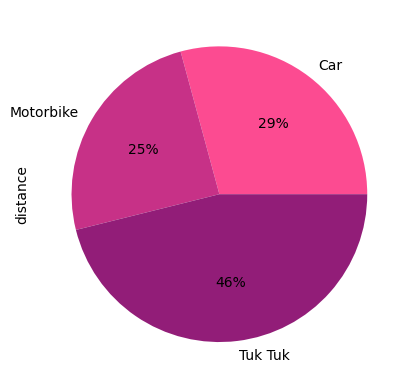

In [ ]:
df.groupby(['vehicle'])['distance'].mean().plot(kind='pie',autopct='%1.0f%%', colors=sns.color_palette(colors_4));

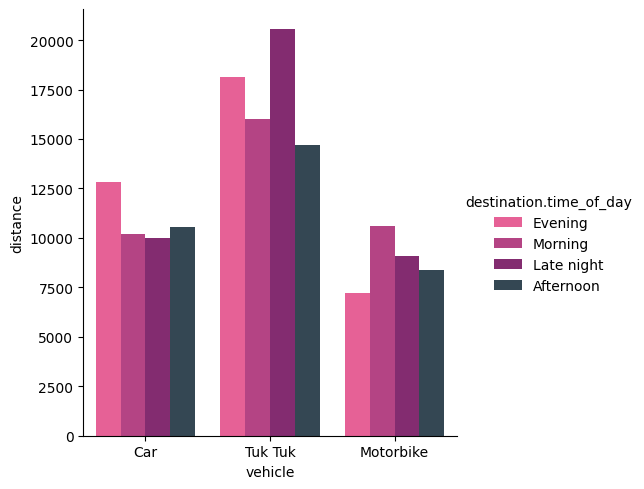

<Figure size 1500x1000 with 0 Axes>

In [ ]:
sns.catplot(data=df,kind='bar',x='vehicle',y='distance',hue='destination.time_of_day',errorbar=('ci', False),palette=sns.color_palette(colors_4));
plt.figure(figsize=(15,10));

- Smaller vehicles i.e TukTuks collectively travel **longer** distances compared to cars.
- **Toyota Hiace** has covered the **most** distance while **Maruti** has covered the **least** distance in metres.